# Nice name! Where does it come from?

In this notebook, we will guide you through the data and code that allowed us to write our data story.

In [9]:
# Allows to modify the code and see the changes in the notebook without restarting the kernel
%load_ext autoreload
%autoreload 2

# Allows to display plots in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# CMU characters and movies datasets

For this project we decided to work on the CMU movie dataset containing metadata extracted from Freebase, including Movie metadata like Movie box office revenue, genre, release date, runtime, and language but also Character metada like character names and aligned information about the actors who portray them, including gender and estimated age at the time of the movie's release. 
First let's see what the 2 metadasets contains.

#### Characters
The dataset contains informations  450,669 characters aligned to the movies such as Wikipedia movie ID,  Freebase movie ID, Movie release date, Character name, Actor date of birth, Actor gender, Actor height (in meters), Actor ethnicity,Actor name, Actor age at movie release, Freebase character/actor map ID, Freebase character ID, Freebase actor ID. 


#### Movies
The dataset contains informations on 81,741 movies such as the Wikipedia movie ID, Freebase movie ID, Movie name, Movie release date, Movie box office revenue, Movie runtime, Movie languages, Movie countries, Movie genres .



## Cleaning

The cleaning task was implement in the *clean_raw_data()* method of our different CharacterData and MovieData classes implementation and is validated using the *check_clean_data()* method, available on both classes.

From both metadataset, we directly oberved similar features such as Wikipedia Movie ID and Freebase Movie ID that is useful for futur merge of the 2 dataset. However, as in both datasets we saw that there were several columns containing Freebase and Wikipedia IDs for actors, characters and films, we decided to put them aside as the data is too difficult to access. (Freebase was discontinued a few years ago)

This are the different steps we applied to both datasets before merging:

**Character dataset**:
- Load with the right spacer.
- Rename the columns for proper understanding.
- Check the good type format : Actor date of birth and the Release Date as a datetime, and the other into objects.
- Deal with missing values : we wrote them as NaN or NaT
- Droping unwanted columns
- Checking that the cleaning was made

**Movie dataset**:
- Load with the right spacer.
- Rename the columns for proper understanding.
- Modify the Language, Country and Genre columns:  the information was a JSON format not readable nor accessible so we isolate the information and replace it by a human-readable string format.
- Modify the datatypes of movie runtime into timedelta and the release date into a datetime object for further manipulation.
- Modify the movie Name, Language, Country and Genre:  we checked that they were in object type and modified them if not.
- Deal with missing values : we wrote them as NaN or NaT
- Dropping the unwanted columns
- Check that the cleaning was made


We kept the whole dataset with NaN and NaT values in a specific file to keep features that could be interesting even if the rate of missing values is very high (such as etchnicity or Box office revenue). However, for the following notebook, to make some we decided to remove this 2 columns since they have more than 70% missing values.


## Demo

Here, we will import and clean the data base to demonstrate the process.

### MCU characters


In [10]:
import src.data.movies_char_data as mcd

# Characters data
characters = mcd.CharacterData("MCU Characters", "character.metadata.tsv", output_name = "character_data_clean.csv")
# The raw (uncleaned) data can be accessed with the attribute 'raw_df'
characters.raw_df.head()

MCU Characters : loaded 450668 rows !


,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.62,Unnamed: 7,Wanda De Jesus,42,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
0,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
1,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
2,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
3,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
4,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft


In [11]:
# We can clean the data using the method 'clean_raw_data'
characters.clean_raw_data()
# The cleaned data can be accessed by calling the instance of the class
characters().head(5)


MCU Characters : Cleaning the raw data


,Wikipedia_movie_ID,Release_date,Character_name,Actor_DOB,Actor_gender,Actor_height,Actor_name,Actor_age
0,975900,2001-08-24,LIEUTENANT MELANIE BALLARD,1974-08-15,F,1.780,NATASHA HENSTRIDGE,27.0
1,975900,2001-08-24,DESOLATION WILLIAMS,1969-06-15,M,1.727,ICE CUBE,32.0
2,975900,2001-08-24,SGT JERICHO BUTLER,1967-09-12,M,1.750,JASON STATHAM,33.0
3,975900,2001-08-24,BASHIRA KINCAID,1977-09-25,F,1.650,CLEA DUVALL,23.0
4,975900,2001-08-24,COMMANDER HELENA BRADDOCK,1949-05-26,F,1.727,PAM GRIER,52.0


### MCU Movies

In [12]:
movies = mcd.MovieData("MCU Movies", "movie.metadata.tsv", output_name = "movie_data_clean.csv")

# Same methods are accessible, since they are inherited from the same parent class (DataClass)
movies.raw_df.head()


MCU Movies : loaded 81740 rows !


,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science Fiction"", ""/m/03npn"": ""Horror"", ""/m/03k9fj"": ""Adventure"", ""/m/0fdjb"": ""Supernatural"", ""/m/02kdv5l"": ""Action"", ""/m/09zvmj"": ""Space western""}"
0,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
1,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
2,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
3,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
4,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."


In [13]:
# We can clean the data using the method 'clean_raw_data'
movies.clean_raw_data()
movies().head(5)

,Wikipedia_movie_ID,Movie_name,Release_date,Revenue,Runtime,Languages,Countries,Genres
0,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,0 days 01:35:00,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
1,28463795,Brun bitter,NaT,NaN,0 days 01:23:00,Norwegian,Norway,"Crime Fiction, Drama"
2,9363483,White Of The Eye,NaT,NaN,0 days 01:50:00,English,United Kingdom,"Thriller, Erotic thriller, Psychological thriller"
3,261236,A Woman in Flames,NaT,NaN,0 days 01:46:00,German,Germany,Drama
4,13696889,The Gangsters,1913-05-29,NaN,0 days 00:35:00,"Silent film, English",United States of America,"Short Film, Silent film, Indie, Black-and-whit..."


### Combine the CMU datasets
We also made a function to combine those two data sets, which allows us to have the information about characters and directly the information about the movie they are in

In [14]:
import src.utils.movies_utils as mu

merged_cmu = mu.merge_movies_characters_data(movies, characters)
merged_cmu.head(5)

Duplicates found: 412 duplicates ! removing them...


,Wikipedia_movie_ID,Movie_name,Release_date,Revenue,Runtime,Languages,Countries,Genres,Character_name,Actor_DOB,Actor_gender,Actor_height,Actor_name,Actor_age
0,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,0 days 01:35:00,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",POLICE OFFICER,NaT,M,NaN,ALLEN CUTLER,NaN
1,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,0 days 01:35:00,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",REPORTER,1956-12-19,F,NaN,ALICE BARRETT,43.0
2,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,0 days 01:35:00,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",FBI PROFILER ROBERT HANKS,1950-01-05,M,NaN,ROBERT CATRINI,50.0
3,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,0 days 01:35:00,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",JOHN RAMSEY,1945-02-12,M,1.85,CLIFF DEYOUNG,55.0
4,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,0 days 01:35:00,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",PATSY RAMSEY,1964-07-12,F,1.63,JUDI EVANS,35.0


## Augmenting the data using IMDB
As you might have seen, some of the columns contain inexisting values (NaN, NaT, ...). The graph below presents the percentage of NaN values in % per column.

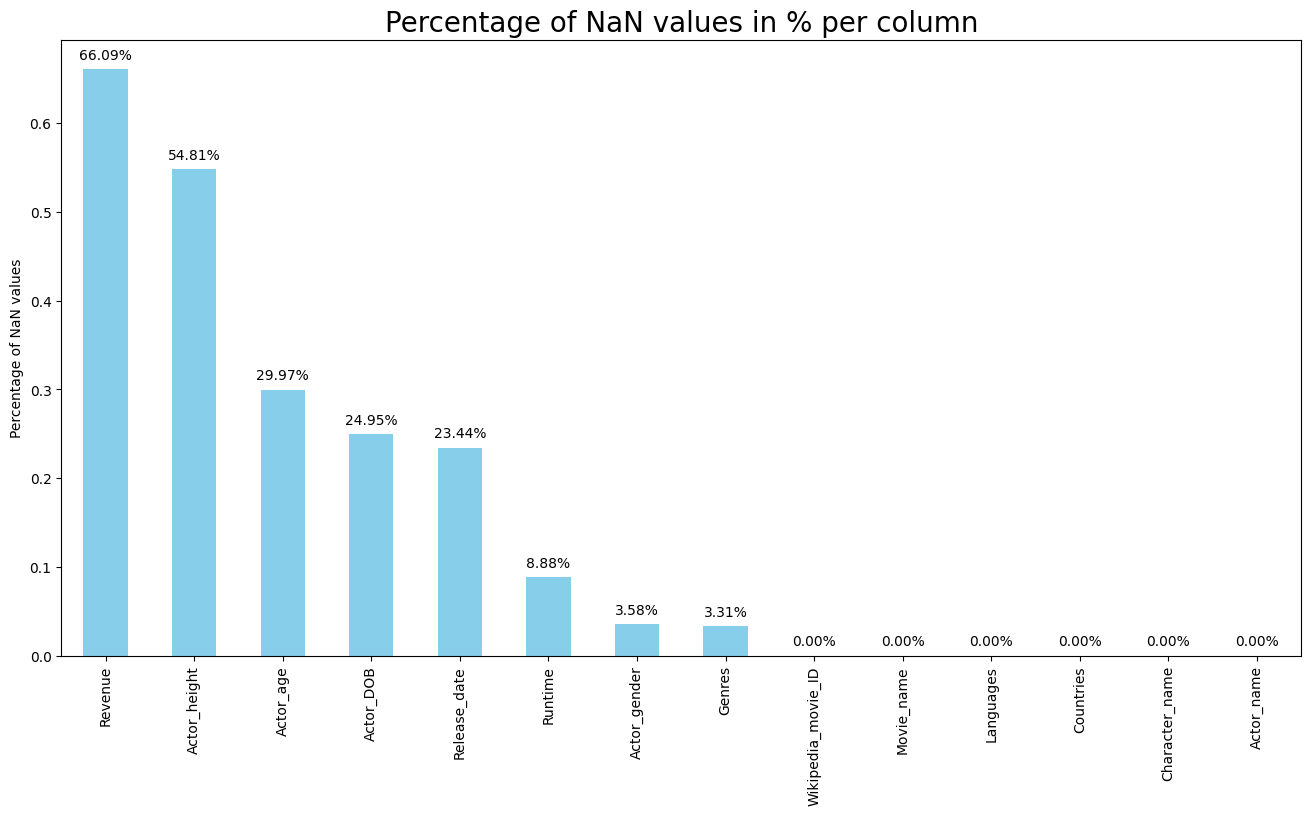

In [15]:
# Visualizing the number of missing values per columns
nan_percentage = merged_cmu.isnull().mean().sort_values(ascending=False)

# Plot the percentage of NaN values per column
ax = nan_percentage.plot(kind='bar', figsize=(16, 8), color='skyblue')
plt.ylabel('Percentage of NaN values')
plt.title('Percentage of NaN values in % per column', fontsize=20)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

 For example, for the revenue of a movie and the release date, here are the proportion of missing values:

In [16]:
# Proportion of missing values in the "Revenue" column
missing_revenue = merged_cmu["Revenue"].isnull().sum() / len(merged_cmu) * 100
print(f"Proportion of missing values in the 'Revenue' column: {missing_revenue:.2f}%")

Proportion of missing values in the 'Revenue' column: 66.09%


In [17]:
# Proportion of missing Release Date
missing_release_date = merged_cmu["Release_date"].isnull().sum() / len(merged_cmu) * 100
print(f"Proportion of missing values in the 'Release_date' column: {missing_release_date:.2f}%")

Proportion of missing values in the 'Release_date' column: 23.44%


Those two columns are crucial for our project, and even for big movies like "Pulp Fiction", data is missing (no start date in this case). We therefore managed to match the movies in the CMU dataset with the ones of IMDB, using their [Non-Commercial Datasets](https://developer.imdb.com/non-commercial-datasets/).

The problem is that those two datasets **don't share any unique identifier** to easily match the two together, so we needed to be a bit more creative. What we used is the **name of the movie**, but we couldn't simply compare the strings, since they are not written in the exact same manner. We decided to go with a library called *Rapidfuzz* which allows us to determine the similarty of two strings, which we used for the name matching.

Here is a typical example of why this is needed (both titles are the one in the datasets)

In [18]:
from rapidfuzz import fuzz

example_title_cmu = "Star Wars Episode IV: A New Hope" # Example title from the CMU database
example_title_imdb = "Star Wars: Episode IV - A New Hope" # Example title from the IMDB database

exact_match = example_title_cmu == example_title_imdb
similarity_match = fuzz.ratio(example_title_cmu, example_title_imdb) > 90

print(f"Using a strict comparison on the name: {exact_match}")
print(f"Using a similarity ratio at 90%: {similarity_match}")

ModuleNotFoundError: No module named 'rapidfuzz'

The whole process takes quite some time to run, so we will only load the merged dataframe in this notebook, but the exact computation can be found in *src/utils/imdb_manipulation.py*.

A year column was added and used to complete the Release_date was missing. Since IMDB doesn't provide the revenue, we added the number of vote and the rating, so that we can guess the level of popularity of a movie.

In [19]:
import src.utils.pipelines as pipelines

all_cmu_and_imdb_data = pipelines.read_CMU_IMDB()
cmu_imdb_merged = all_cmu_and_imdb_data[1]
cmu_imdb_merged.sample(5)

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


,Wikipedia_movie_ID,Movie_name,Release_date,Revenue,Runtime,Languages,Countries,Genres,weightedAverageRating,totalVotes,is_blockbuster,year
248,101910.0,the towering inferno,1974-12-10,139700000.0,0 days 02:45:00,English,United States of America,"Disaster, Action/Adventure, Ensemble Film, Act...",7.0,49465.0,False,1974
481,509676.0,glory,1989-01-01,26828365.0,0 days 02:04:00,English,United States of America,"Costume drama, Epic, Period piece, Drama, War ...",7.8,147321.0,False,1989
867,12252836.0,skyfall,2012-10-23,NaN,NaN,English,"United States of America, United Kingdom","Thriller, Action, Adventure",7.8,743007.0,True,2012
701,673599.0,men in black ii,2002-07-03,441818803.0,0 days 01:28:00,English,United States of America,"Science Fiction, Buddy film, Action/Adventure,...",6.2,412619.0,False,2002
527,5587473.0,aladdin,1992-01-01,NaN,0 days 00:49:00,English,"United States of America, Japan","Family Film, Japanese Movies, Adventure, Anima...",8.0,479836.0,True,1992


#### Distribution of the number of votes in the dataset

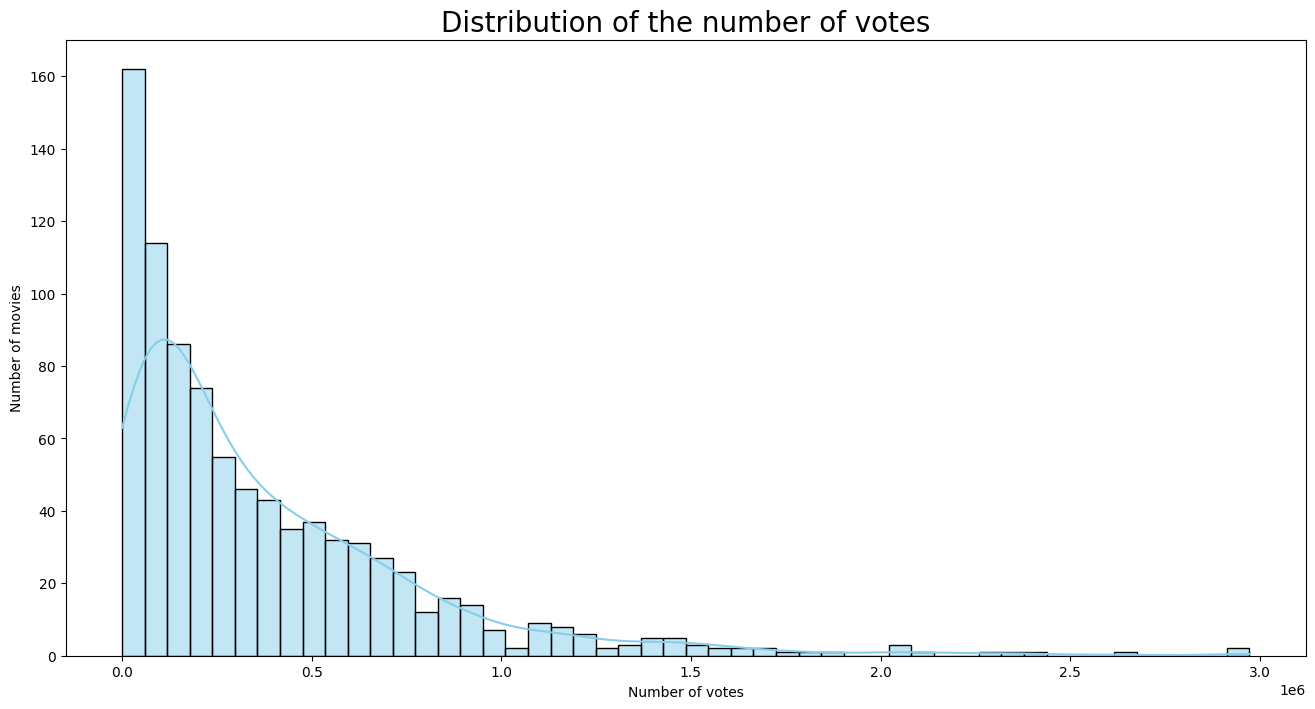

In [20]:
# Visualizing the distribtion of the number of votes in the dataset
plt.figure(figsize=(16, 8))
sns.histplot(cmu_imdb_merged['totalVotes'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of the number of votes', fontsize=20)
plt.xlabel('Number of votes')
plt.ylabel('Number of movies')
plt.show()


####  Visualizing the top 50 movies with biggest Revenue and comparing it with the top 50 movies with best rating

Since there are a lot of movies with missing value for their revenue, we decided to use the number of votes, obtained by the imdb dataset, to determine wether a film is popular or not. 

C:\Users\Pauline\AppData\Local\Temp\ipykernel_17252\2799425006.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




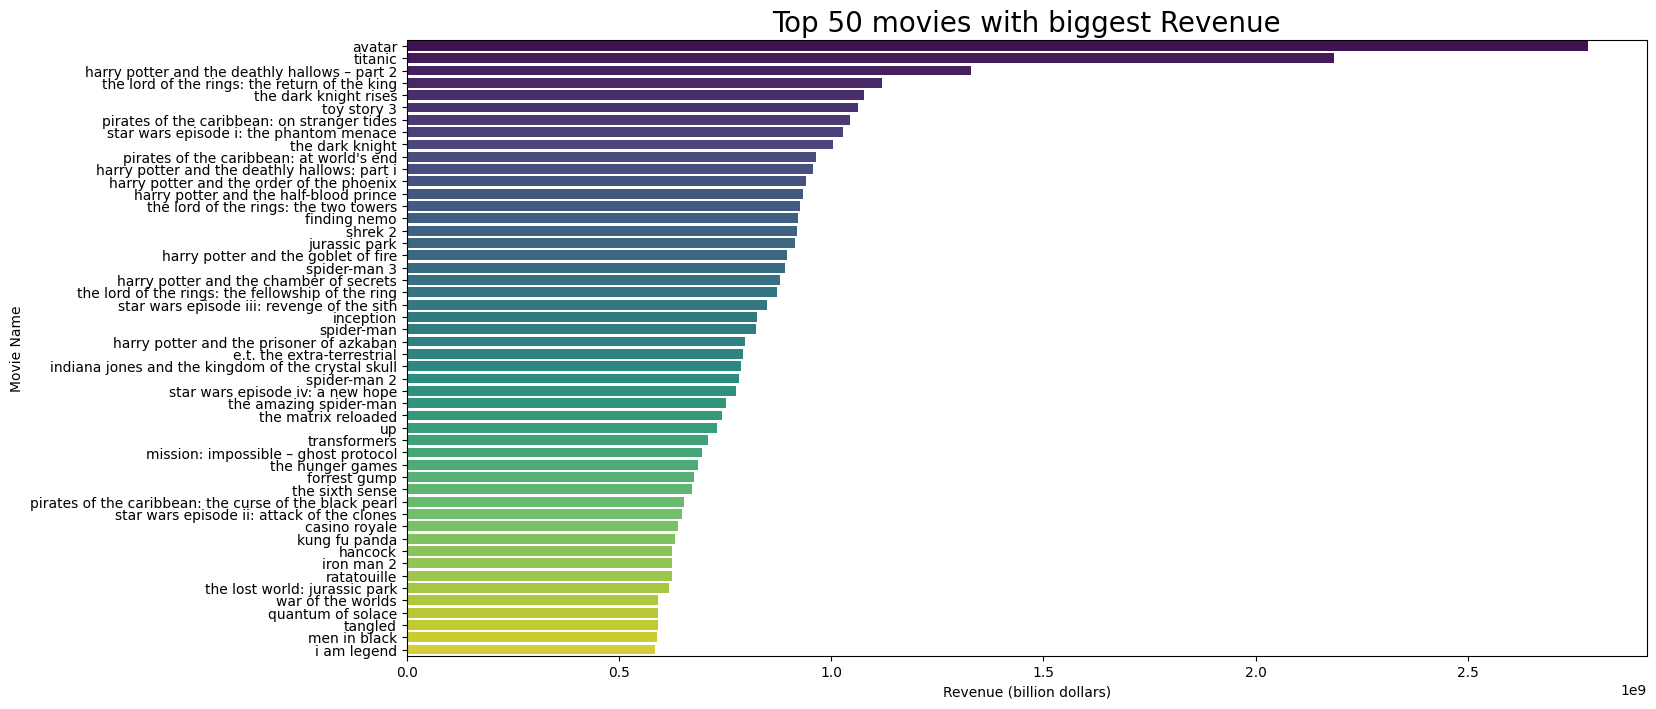

In [21]:
# Group by the Movie name 
top_50_movies = cmu_imdb_merged.groupby('Movie_name')['Revenue'].sum().sort_values(ascending=False).head(50)

plt.figure(figsize=(16, 8))
sns.barplot(x=top_50_movies.values, y=top_50_movies.index, palette='viridis', legend=False)
plt.xlabel('Revenue (billion dollars)')
plt.ylabel('Movie Name')
plt.title('Top 50 movies with biggest Revenue', fontsize=20)
plt.show()


C:\Users\Pauline\AppData\Local\Temp\ipykernel_17252\3343145505.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




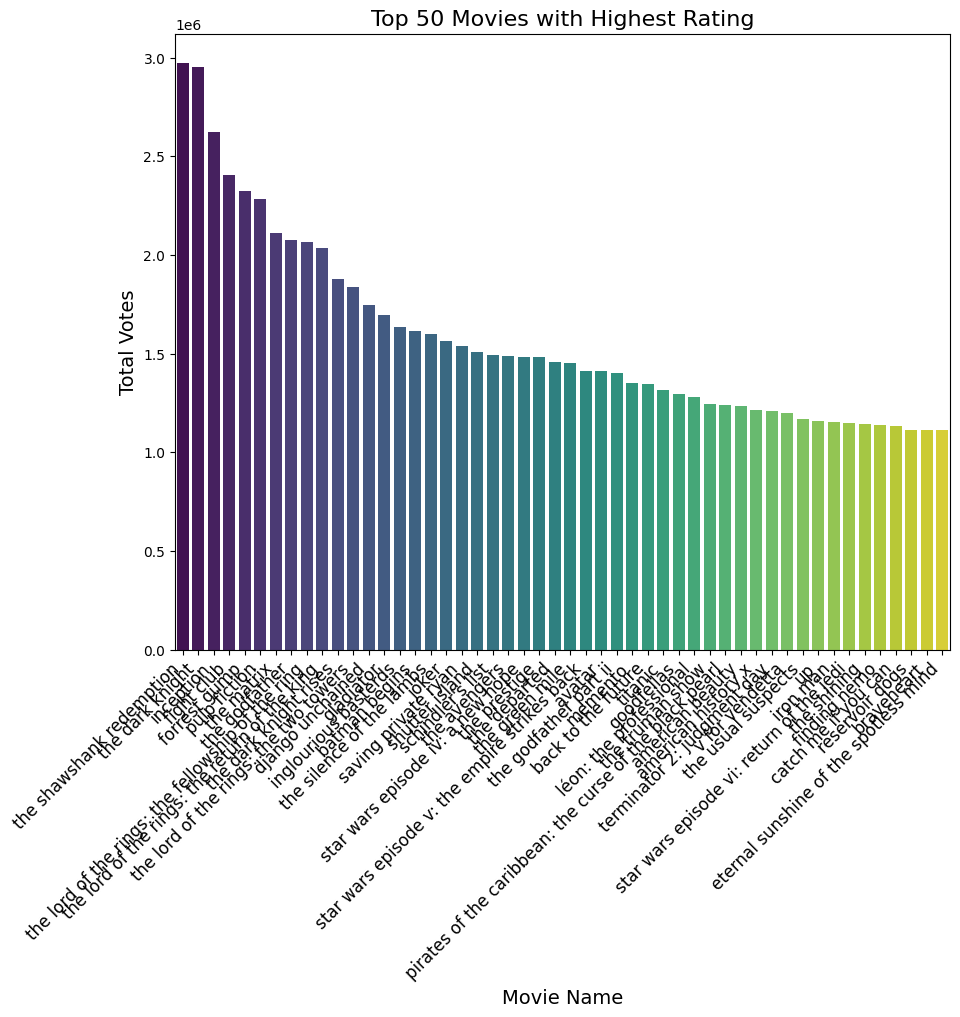

In [22]:
top_50_movies_votes = cmu_imdb_merged.groupby('Movie_name')['totalVotes'].mean().sort_values(ascending=False).head(50)

plt.figure(figsize=(10, 8))
sns.barplot(y=top_50_movies_votes.values, x=top_50_movies_votes.index, palette='viridis')
plt.ylabel('Total Votes', fontsize=14)
plt.xlabel('Movie Name', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.title('Top 50 Movies with Highest Rating', fontsize=16)
plt.show()


In [23]:
# Find the common films in both series
common_films = top_50_movies_votes.index.intersection(top_50_movies.index)

# Print the statistics
print(f"There are only {len(common_films)} films in common. They are:")
for film in common_films:
    print(film)

There are only 13 films in common. They are:
the dark knight
inception
forrest gump
the lord of the rings: the fellowship of the ring
the lord of the rings: the return of the king
the dark knight rises
the lord of the rings: the two towers
star wars episode iv: a new hope
avatar
titanic
pirates of the caribbean: the curse of the black pearl
up
finding nemo


### Information about movies genre 

In [24]:
import plotly.express as px
# Grouping the movies by genre and counting the number of movies in each genre
movies_by_genre = cmu_imdb_merged['Genres'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('Genre')
movies_by_genre = movies_by_genre[movies_by_genre != ''].value_counts()

# Grouping the genres with less than 1% of the total number of movies as 'Other'
threshold = 0.01
total_movies = movies_by_genre.sum()
movies_by_genre = movies_by_genre[movies_by_genre / total_movies > threshold]
movies_by_genre['Other'] = total_movies - movies_by_genre.sum()

# Create a DataFrame for the genres
filtered_genres = movies_by_genre[movies_by_genre.index != 'Other']
genres_df = filtered_genres.reset_index()
genres_df.columns = ['Genre', 'Count']

fig = px.pie(
    genres_df, 
    values='Count', 
    names='Genre' 
)

# Update the layout to position the title at the top
fig.update_layout(
    title={
        'text': "Genres of the Movies (Genres > 1%)",
        'y': 0.95,  # Vertical position 
        'x': 0.5,   # Horizontal position 
        'xanchor': 'center',
        'yanchor': 'top',
    },
    title_font=dict(size=20),  
)

# Show the chart
fig.show()


# Names datasets

In order to answer our research questions, we needed to find some birth registries from different countries. Those were freely available and we found datasets for the following countries:

- France
- USA
- United Kingdom
- Norway

Since they all came from different places and didn't follow the same structure, we had to decide what kind of data was necessary for our project and what structure would be the most practical to work with. We ended-up with the following collumns in our dataframes:

1. **Year** : An integer value giving the year of the count 
2. **Name** :  A string representing the name that was counted
3. **Sex** : There are two possible characters, 'F' (female) and 'M' (male)
4. **Count** : An integer value giving the count of the name during this year

## Data homogenization

The cleaning task was implement in the *clean_raw_data()* method of our different NamesData classes implementation (by country) and validated using the *check_clean_data()* method, available and shared by all the name datasets (python inheritance).

### Column structure
This task was not too difficult since it was mostly reordering, renaming the ones needed and dropping the ones that were not useful for our project. We also made sure that the same type was used on the collumns of the different datasets. 

### Year 
All of our dataset had the same year format, but some had missing values in this field, which made those row useless and they were therefore discarded.
This collumn made it hard to find datasets from more countries, since a lot of them started to count only in the early 2000's, which doesn't give us enough data to detect real changes in the distribution. (The movie data base ends in 2012)

### Name
This was the hardest column to sanitize and clean since a lot of variation of a same name are possible. We ended by defining a regex expression do define what we would accept as a valid name : ^[A-Z-\s\']+$

This allows us to limit ourselves to names composed only of capitalized letters, spaces, '-' for composed names and ''' for the some regional variations. This rule is really strict and would have made us lose a considerable proportion of our dataset. This is where the data cleaning process came to help homogenize our data and it mainly consisted of the following operations:

- Converting all the name to uppercase
- Removing all accents on letter, for example é becomes e.

Some names have different spellings, for example you can write JEREMY and JEREMIE, but we decided to count this as two separate entries since grouping "similar" is out of the scope of this project and is not an uniformised concept.

### Sex
The french dataset had some integer values that we converted to the expected format. This field is useful for our research questions, but complicated the dataset research, since a lot of countries did not include this information in their registries.

Another issue we encoutered was that some names are given to both men and women. We decided to only keep the data of the sex containg the largest amount of data.

### Validation

The python class representing our datasets contains a method *check_clean_data()* that checks multiple conditions to be sure that the data is uniform. 

- Checks the collumns' name
- Checks if some missing values are present
- Checks the data type of each collumn
- Checks for duplicated rows (same name, same sex and same name)
- Checks that the strings respects the defined regex expressions
- Checks that the counts and years are coherent numbers 

## Demo

Here, we will import and clean the data base to demonstrate the process.


In [25]:
import src.data.names_data as NamesData
ukNames = NamesData.UKNamesData("UK", "ukbabynames.csv")

# The raw data directly from the file
ukNames.raw_df.head()

UK : loaded 565817 rows !


,year,sex,name,n,rank,nation
0,1996.0,F,SOPHIE,7087.0,1.0,England & Wales
1,1996.0,F,CHLOE,6824.0,2.0,England & Wales
2,1996.0,F,JESSICA,6711.0,3.0,England & Wales
3,1996.0,F,EMILY,6415.0,4.0,England & Wales
4,1996.0,F,LAUREN,6299.0,5.0,England & Wales


In [26]:
# We can call the cleaning method, which will correct the columns' names and ordering, and clean the content
ukNames.clean_raw_data()
ukNames().head() #  This is the cleaned data

UK : Data is clean and conforms to the expected structure !


,Year,Name,Sex,Count
0,1974,AALIA,F,1
1,1974,AAMIR,M,1
2,1974,AARON,M,17
3,1974,ABADAH,F,1
4,1974,ABBEY,F,1


In [27]:
frenchNames = NamesData.FranceNamesData("France", "france.csv", "https://www.insee.fr/fr/statistiques/8205621?sommaire=8205628#dictionnaire", ";")
frenchNames.raw_df.head()

France : loaded 3884324 rows !


,sexe,preusuel,annais,dpt,nombre
0,1,A,XXXX,XX,27
1,1,AADAM,XXXX,XX,38
2,1,AADEL,XXXX,XX,56
3,1,AADHIRAN,2023,93,5
4,1,AADHIRAN,XXXX,XX,15


In [28]:
frenchNames.clean_raw_data()
frenchNames().head()


France : Data is clean and conforms to the expected structure !


,Year,Name,Sex,Count
0,1900,ABEL,M,382
1,1900,MARIE-ANNE,F,42
2,1900,MARIE-ANTOINETTE,F,61
3,1900,MARIE-EUGENIE,F,3
4,1900,MARIE-FRANCOISE,F,20


In [29]:
USNames = NamesData.USNamesData("US", "babyNamesUSYOB-full.csv")
USNames.raw_df.head()

US : loaded 1858689 rows !


,YearOfBirth,Name,Sex,Number
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746


In [30]:
USNames.clean_raw_data()
USNames().head()

US : Data is clean and conforms to the expected structure !


,Year,Name,Sex,Count
0,1880,MARY,F,7065
1,1880,ANNA,F,2604
2,1880,EMMA,F,2003
3,1880,ELIZABETH,F,1939
4,1880,MINNIE,F,1746


In [31]:
norvegianNames = NamesData.NovergianNamesData("Norway", "norway/norway_merged.csv")
norvegianNames.raw_df.head()

Norway : loaded 277632 rows !


,first name,year,Born persons,Sex
0,Aage,1880,..,M
1,Aage,1881,..,M
2,Aage,1882,..,M
3,Aage,1883,..,M
4,Aage,1884,..,M


In [32]:
norvegianNames.clean_raw_data()
norvegianNames().head()

Norway : Data is clean and conforms to the expected structure !


,Year,Name,Sex,Count
0,1945,AAGE,M,74
1,1945,AAGOT,F,11
2,1945,AASE,F,128
3,1945,AASTA,F,8
4,1945,ABDUL,M,12


### Merging the datasets
If we want to answer a question with no regards to the provenance of the names, we can use our function to group all the datasets together

In [33]:
import src.utils.names_utils as nu

global_names = nu.merge_names_data([ukNames, frenchNames, USNames, norvegianNames])

# Keep only the name with the most data per sex
global_names.sex_handling()

global_names().head()

UK : Data is clean and conforms to the expected structure !
France : Data is clean and conforms to the expected structure !
US : Data is clean and conforms to the expected structure !
Norway : Data is clean and conforms to the expected structure !
UK & France & US & Norway : Data is clean and conforms to the expected structure !


,Year,Name,Sex,Count
0,1880,AARON,M,102
1,1880,AB,M,5
2,1880,ABBIE,F,71
3,1880,ABBOTT,M,5
4,1880,ABBY,F,6


# How did we use this data?

Now that we have presented the data used in this project, we will go through the pipelines that were used and what we get from them.

All the pipelines are located in the file */src/utils/pipelines.py*

## Preparing the data

In order to to get all the data that we need ready to go, we have 4 main functions:
- write_all_names_data()
- read_all_names_data()
- write_CMU_and_IMDB()
- read_CMU_IMDB()

The functions starting with write do all the strong computation and then store the results in CSV files, which makes it easier to work with due to the delay it would take otherwise.

The all_names_data() functions are basically doing the same thing as showed above


In [34]:
global_names, uk_names, france_names, us_names, norway_names = pipelines.read_all_names_data()
global_names().sample(5)

UK : Loading clean data from data/clean/names/ukbabynames.csv
France : Loading clean data from data/clean/names/france.csv
US : Loading clean data from data/clean/names/babyNamesUSYOB-full.csv
Norway : Loading clean data from data/clean/names/norway_merged.csv
UK & France & US & Norway : Loading clean data from data/clean/names/UK_France_US_Norway.csv


,Year,Name,Sex,Count
1182130,2010,DAJOHN,M,9
763604,1998,NIKET,M,6
58248,1964,MARISEL,F,9
700512,1996,MICALAH,F,15
406855,1985,ABRAM,M,151


The **write_CMU_and_IMDB** function is a bit more interesting, since it is doing a lot of the filtering needed for the second part of our project to work. Once again, since the computation takes around 20 minutes, we will simply read the saved data

In [35]:
import src.utils.pipelines as pipelines

main_chars, top_n_per_year, merged_cmu_imdb, movies_chars_joined, _, _, _ = pipelines.read_CMU_IMDB()

1. It starts by reading and cleaning the CMU data (movies + char), as already seen above
2. We read data from the IMDB raw files merge them with the CMU titles with the sensitivity matching, which allows us to have more information, such as the rating given by users and the number of votes


In [36]:
merged_cmu_imdb.sample(3)

,Wikipedia_movie_ID,Movie_name,Release_date,Revenue,Runtime,Languages,Countries,Genres,weightedAverageRating,totalVotes,is_blockbuster
46384,6023801.0,the ugly,1997-08-26,NaN,0 days 01:32:00,English,"Australia, New Zealand","Thriller, B-movie, Indie, Psychological thrill...",6.0,3163.0,False
51102,33521974.0,wicked spring,2002-01-01,NaN,0 days 01:45:00,NaN,NaN,"Period piece, Action, Drama, Historical fiction",4.7,1049.0,False
36101,3484353.0,stephen tobolowsky's birthday party,2005-01-01,NaN,0 days 01:27:00,English,United States of America,"Film & Television History, Biography, Indie, F...",7.8,307.0,False


3. Our project is about the influence of the character's names, therefore we assumed that scenario would in most cases happen only if the movie has some kind of fame, which is why we keep only the top 15 movies per year with the most votes.

In [37]:
top_n_per_year.tail(3)

,Wikipedia_movie_ID,Movie_name,Release_date,Revenue,Runtime,Languages,Countries,Genres,weightedAverageRating,totalVotes,is_blockbuster,year
873,30265620.0,the perks of being a wallflower,2012-09-08,NaN,NaN,English,United States of America,"Romance Film, Drama",7.9,560902.0,True,2012
874,33502433.0,the silver linings playbook,2012-11-21,NaN,0 days 02:00:00,NaN,United States of America,Comedy,7.7,752153.0,True,2012
875,32071439.0,wreck-it ralph,2012-11-01,NaN,NaN,English,United States of America,"Family Film, Comedy, Animation",7.7,470813.0,True,2012


## How to define a main character ? 

To identify the main characters in the top 15 movies per year, we utilized the plot summaries provided in the file data/raw/plot_summaries.txt.

### Structure of the Plot Summaries
Each plot summary in the file follows the same structure:

Wikipedia ID    Plot Summary \n

Using this format, we wrote a function to extract both the Wikipedia ID and the plot summary. However, since the file contains data for all movies, we filtered it to include only the top 15 movies per year based on our previous analysis. This step reduced computation time significantly. During this process, we also associated each movie's name with its corresponding Wikipedia ID and its realeased year.

### Extracting Main Characters
Once we had the filtered data, the next step was to identify the main characters. For this task, we used spaCy, an open-source library for Natural Language Processing in Python. Here's how the process unfolded:

1. **Data Preparation**

After extracting the relevant plot summaries, we created a DataFrame with the following structure:
'Wikipedia ID', 'Movie Name', 'Plot Summary', 'Year'. 

2. **Character Recognition**

Using spaCy, we analyzed each plot summary and labeled the words in the text. For every entity tagged as PERSON (i.e., a named individual), we identified the most "complete" name. For example, if spaCy recognized "Katniss" once and "Katniss Everdeen" three times, we aggregated the counts and retained the full name "Katniss Everdeen."

3. **Threshold Application**

We then calculated the frequency of each character's name in the plot. To ensure relevance, we applied a threshold: only characters appearing at least twice in the plot summary were retained.

This approach provided a streamlined way to detect main characters. In the end, we produced a DataFrame containing the character names and their respective counts for each movie.


In [38]:
main_chars.sort_values(by="Year").head(5)

,Wikipedia ID,Movie Name,Year,Character Name,Count
1195,330874,l'avventura,1960,Claudia,5
1513,5989305,breathless,1960,Jesse Lujack,9
1196,330874,l'avventura,1960,Gloria Perkins,3
1194,330874,l'avventura,1960,Anna,23
1121,166813,spartacus,1960,Varinia,5


# Influence of a character's name

Now that we have all the data that we need, we can focus on our biggest question: How can we have some indications of the level of influence of a movie on a name given to newborns?


## Names invented by movies and names with no chances of being influenced positively

This method is one of the most intuitive one and allows us to reduce the numbers of candidate for the following ones by a lot! 

We start from the **main_chars dataset**, which contains the name of the main characters for each of the top 15 movies per year. 

This is when we faced a new problem: How do we deal with "composed" names? For example, when you find a character named "Luke Skywalker", how do you know what the firstname actually is? Since the data does not follow any convention, we could not really find a way to answer this question.

Since this method is not computationally expensive, we splitted the name on two different rows of the dataset, and added a column to keep the full one. (ie. one row for Luke, one for Skywalker).

Then we **intersect this dataframe** with the previously mentioned datasets containing the name given in the real world to newborns. This allows us to keep only the names that are actually given to babies. (Avoid keeping the "Mr" in "Mr Red"). To do this intersection, we needed to be sure that the character names were in the same format as the ones in the names datasets, which are **upper case letters** with no **accents**. You can see this transformation in the "Normalized_name" column 

Once this is done, we apply a simple algorithm on each row, that using the data of the birth datasets, computes the mean number of time the name was given after the release of the movie and the mean before. We then substract those two values and this gives us what a we call the "difference in means"

(The detailed computation is done in *src/utils/pipelines.py* in the compute_all_influence_mean() function)



In [39]:
diff_in_means = pipelines.load_influenced_means()
diff_in_means.sample(5)

,Wikipedia ID,Movie Name,Year,Character Name,Count,Full name,Normalized_name,Influence
1287,161897,cool hand luke,1967,Jackson,2,Lucas Jackson,JACKSON,5.900000
1230,27279709,rise of the planet of the apes,2011,Franklin,2,Robert Franklin,FRANKLIN,9.233333
1982,406339,the crow,1994,Darla,4,Darla,DARLA,-8.166667
2473,6446061,live and let die,1973,Rosie,2,Rosie Carver,ROSIE,-91.333333
1557,667368,harry potter and the chamber of secrets,2002,Ginny,6,Harry finds Ginny,GINNY,0.500000


You can see the result above, and the column "Influence" contains some intersting information:
- If the value is < 0, the average number of people named with the character's names has actually decreased, so we can put this row aside
- If the value is +inf, we manually added this to isolate cases where the name was given for the first time in the two years after the movie -> Was invented by the movie
- If the value is > 0, there was an augmentation and the row is therefore a **candidate for further analysis**

## Determining what an influence is

From the previous dataframe, we were able to elimate all **the unwanted candidates**, but now, we still need to have a way to know if rows with a positive "Influence" column **have actually been influenced**.

### The idea behind

The method that we are using is called Interrupted Time Series (ITS), which works in the following way:
- You have as input **a date** and some **data with values evoluing through time** (Here it is a time serie representing the counts of the newborns named with a specific name)
- If the date is contained within the time represented in the data range, you split your dataset in two parts around this date: the **training set** and the **"real" set**
- You **train a machine learning model** on the training to forecast what should have happen after the input date, which will give you a curve that we are going to compare with the "real" set
- With those two curves, if the one from **the "real" set grew way faster than the predicted one**, you can suppose that there was a big change in the trend of the name at this point in time, which the machine learning model **could not anticipate** and is therefore not oblivously predictable in previous data.

(All the detailed code for this part is in *src/models/names_prediction.py*)

To predict the evolution of the birth, we tried two models:
1. Prophet
2. SARIMA

### Using Prohet 

Developped by Facebook, Prophet is a fully automatic procedure made for time series forecasting that is used in various context due to it's wide range of features (seasonality, holiday effect, ...) 

In [40]:
import src.models.naming_prediction as naming_prediction

prophet_pred = naming_prediction.predict_naming_prophet(global_names, "LUKE", 1976, 5, True)

AttributeError: 'Prophet' object has no attribute 'stan_backend'

As you can see, Prophet does a complete modeling of the evolution curve, which also contains the previous points. This is due to the fact that this model tries to be as much as possible resistant to outilers.

### Using SARIMA

Well known model for univariate time series forecasting, SARIMA is an extension of the ARIMA model and adds the support for time series with a seasonal behaviour in addition to the trend support of ARIMA.

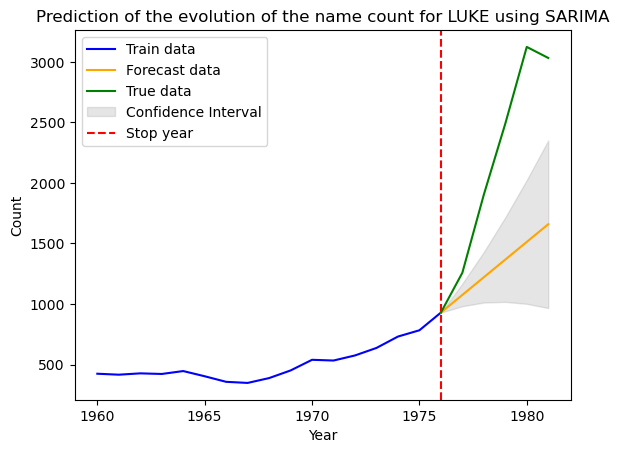

In [81]:
sarima_pred = naming_prediction.predict_naming_ARIMA(global_names, "LUKE", 1976, 5, True)

### Comparing the two models

When testing the two models, we came to the conclusion that **Facebook's Prophet was the better choice for our project**.

As already mentioned, prophet has a built-in compensation system for outliers and was there fore more resistant to changes in the distribution. The data that we train the models on is yearly distributed, which can make quite some difference and sudden jumps, which our SARIMA model wasn't made for (it needs more granual data -> daily or weekly to work well). 

SARIMA is also harder to fine-tune to each name, so Prophet was a more reasonable choice for our project.

## Verification method

In the two previous plots, you can visually see that there is a difference between the two curves after the date of a the movie, but can you detect it automatically? 

We spent a lot time trying different approaches (slope comparison, distance between curves, ...), but the one that gave the best results overall works in the following way:
- The models return the predicted curves and it's **confidence interval**
- To say that a movie has been influenced, we check if the real data lies outside and on top of this confidence interval (with a tolerance at 90%)

The implementation details can be found in *tests/interval_test.py*

In [82]:
import tests.interval_test as validation

pred_counts = prophet_pred["Predicted Count"]
real_counts = prophet_pred["True Count"]

lower_CI = prophet_pred["yhat_lower"]
upper_CI = prophet_pred["yhat_upper"]

tests = validation.outside_interval(pred_counts, upper_CI, lower_CI, real_counts, 0.9)

print(f"The name LUKE was influenced by the Star Wars movie in 1976: {tests}")

The name LUKE was influenced by the Star Wars movie in 1976: True


## Linking it all together

We have the data and all the processing steps needed to know if a movie was influenced, so what still needs to be done is linking the whole together.

This is why the *utils/pipelines.py* file is useful! From this script, we can directly compute the data presented above (name datasets, movie datasets, merge between CMU and IMDB).

The next step is to compute the difference in means with *compute_all_influence_mean(main_characters, names_dataset)*.

Since the process takes around 10 minutes, we can load the result that was previously computed. 

In [83]:
means = pipelines.load_influenced_means()
means.sample(5)

,Wikipedia ID,Movie Name,Year,Character Name,Count,Full name,Normalized_name,Influence
2082,858575,harry potter and the half-blood prince,2009,Ron,7,Ron murmurs,RON,-15.033333
2032,27372372,limitless,2011,Lindy,3,Lindy,LINDY,-10.600000
564,9019882,casino royale,2006,Valerie,2,Valerie Mathis,VALERIE,340.966667
2703,382387,gremlins,1984,Randall,5,Randall Peltzer,RANDALL,-193.100000
3330,174560,willy wonka & the chocolate factory,1971,Joe,8,Grandpa Joe,JOE,-1210.900000


As already exlpained above, the "Influence" column allows us to know which character names are possible candidates. 

The *compute_all_influence_prophet(mean_df, namesData)* in the pipelines file takes the candidates that we found with the difference in means and apply the **interrupted time series** discussed previously with the confidence interval verification method on each of the candidate rows. 

This leaves us with a final datasets of the following form:

In [84]:
prophet_influence = pipelines.load_influenced_prophet()
prophet_influence.head()

,Wikipedia ID,Movie Name,Year,Character Name,Count,Full name,Normalized_name,Mean Difference,Influenced
0,451866,mission: impossible ii,2000,Ethan,18,Ethan Hunt,ETHAN,15725.466667,1
1,633411,the avengers,1998,Emma,15,Emma Peel,EMMA,14985.966667,1
2,3727473,man on fire,1987,Samantha,4,"Samantha ""Sam"" Balletto",SAMANTHA,14453.500000,1
3,347000,suspiria,1977,Sarah,15,Sarah,SARAH,14372.466667,1
4,483274,point break,1991,Tyler,3,Tyler Endicott,TYLER,14176.666667,0


The influenced column is set to 1 if the row passed the verification tests.

 # Data story graphs generation
 

Example graph for the "Try it yourself" results display

In [87]:
from src.models.naming_prediction import predict_naming_ARIMA_with_plotly

predict_naming_ARIMA_with_plotly(global_names.clean_df, "Star Wars IV", "LUKE", 1976, 5, True)


### Heatmap for movies by numer of votes and average rating

In [91]:
from src.utils.heatmap_graph import density_heatmap

density_heatmap(merged_cmu_imdb)



d:\ada-2024-project-dondata2025\src\utils\heatmap_graph.py:26: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Word cloud with the most common names in the dataset

Note: you may need to restart the kernel to use updated packages.


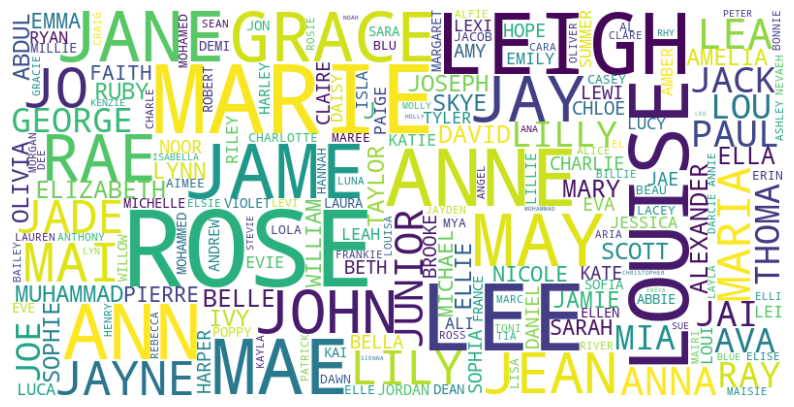

In [98]:
%pip install wordcloud
from src.utils.word_cloud import generate_word_cloud

generate_word_cloud(global_names.clean_df)

### Time analysis by eras graph

In [100]:
from src.utils.time_analysis import show_influence_by_eras

show_influence_by_eras()

d:\ada-2024-project-dondata2025\src\utils\time_analysis.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

d:\ada-2024-project-dondata2025\src\utils\time_analysis.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Movie Genre analysis:
-  influence as a magnitude
- influence as occurence 

In [1]:
from src.utils.genre_analysis import *

In [2]:
show_top10_movie_genre_amplitude()

In [3]:
show_influence_amplitude_by_movie_genre()

By occurence:

In [4]:
show_top_genre_by_count()

Top Genres:


In [5]:
show_top10_genre_occurence()

## Side analysis of Norway influenced names


In [1]:
from src.utils.norway_analysis import *

#### Evolution of Norwegian names trought time: 

NB: How to use this plot : when sliding from decade to an other, please autoscale to visualize the line graphs.

In [2]:
norwegian_names_trend_per_decade()

Visually, there are some names that shows an interesting increase such as:- Thomas 1975 : not due to movies
- Martin 1993 : 
- Emma 2003: 
- Jonas 2006:
- Emile 2014: 
- Nora 2016
- William 2016


It would be interesting to see if they correspond to a release of movies.

In [4]:
evolution_norwegian_names()

### Influenced Norwegian Names

In [3]:
norwegian_influenced_name_per_year()

Unfortunately, the names : Martin (1993), Emma (2003), Jonas (2006), Emile (2014), Nora (2016), William (2016), which demonstrate a important increase in their counts on the graphs, did not appear to be influenced by movies since they are not in the dataset of influenced norwegian names.

In [3]:
evolution_norwegian_influenced_names()

We can noticed some interesting trends over the decades. 
- The 1960s saw a clear peak, with names like Benjamin, George, and Raymond becoming very popular. 
- In the 1970s and 1980s, there was a surprising drop in the number of Danish names influenced by movies. This is unusual because, in the broader dataset, movie-influenced names continued to grow during these years. Popular names in Denmark during this time, such as Anne, Jan, Geir, Thomas, and Lars, seem to reflect more traditional or local choices. 
While we can’t say for sure, it’s possible that social and cultural movements in the 1970s and 1980s encouraged people to stick with local traditions, reducing the impact of international pop culture, like movies. 
- By the 1990s, movie-influenced names started rising again, following the global trend and reflecting the growing reach of international cinema.

For this part of the analysis, we consider that it was not pertinent to add it to the website, since we did not conclude anything from it.